In [1]:
import numpy as np
from pyising import IsingModel

In [2]:
KB = 1
T_CRIT = 2 / np.log(1 + np.sqrt(2))
BETA_CRITICAL = 1 / (KB * T_CRIT)
DELTA_BETA = 0.5

N = 10
NROWS = 200 
NCOLS = 200
TF = 30
FPS = 30

beta_range = np.linspace(BETA_CRITICAL + 0.001, BETA_CRITICAL + 0.1, N)  # np.linspace((1 - DELTA_BETA) * BETA_CRITICAL, (1 + DELTA_BETA) * BETA_CRITICAL, N)
h_range = [0,]  # np.linspace(-0.01, 0.01, N)

## Physics Simulation

#### Wolff Algorithm

Quenching System:   0%|          | 0/899 [00:00<?, ?it/s]

Quenching System:   5%|▌         | 47/899 [01:35<28:46,  2.03s/it]


Gathering Frames: 100%|██████████| 48/48 [00:00<00:00, 114.63it/s]
Writing Video: 49it [00:00, 145.59it/s]                        
Releasing Frames: 49it [00:00, 723.80it/s]              


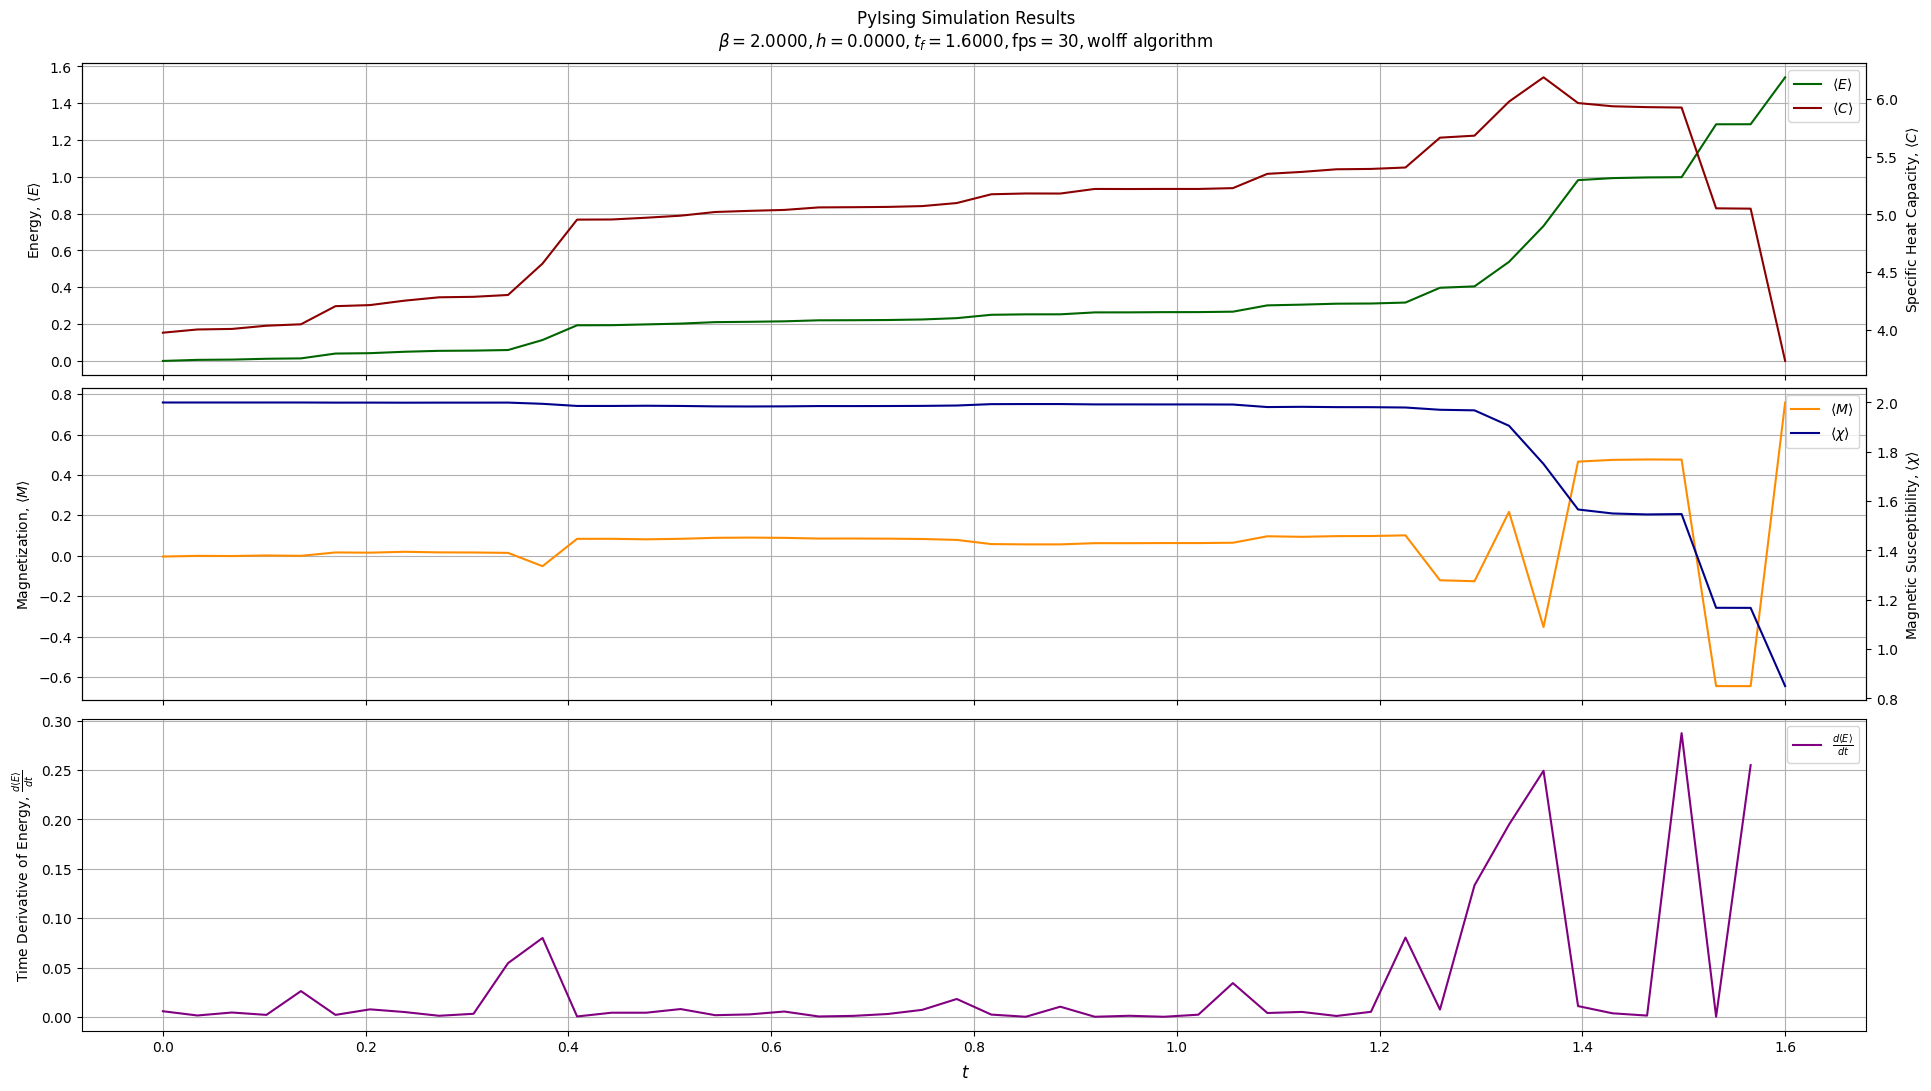

In [3]:
ising = IsingModel(
    tf=TF,
    fps=FPS,
    kB=KB,
    ncols=NCOLS,
    nrows=NROWS
    )

for beta in beta_range:
    for h in h_range:
        ising.reset()
        ising.quench(method='wolff', beta=beta, h=h)
        ising.save_results()
        ising.save_video()

In [4]:
ising.save_video()

Gathering Frames: 100%|██████████| 705/705 [00:07<00:00, 90.50it/s] 
Writing Video: 706it [00:05, 134.90it/s]                         
Releasing Frames: 706it [00:00, 3229.07it/s]                         


'results/pyising_200x200_b=0.5141_h=0.0000_tf=30_fps=30_method=wolff.avi'

#### Metropolis-Hastings Algorithm

In [ ]:
ising = IsingModel(
    tf=TF,
    fps=FPS,
    kB=KB,
    ncols=NCOLS,
    nrows=NROWS
    )

for beta in beta_range:
    for h in h_range:
        ising.reset()
        ising.quench(beta=beta, h=h, method='metropolis-hastings')
        ising.save_results()
        ising.save_video()

## Visual Simulation
#### Wolff Algorithm

In [3]:
ising = IsingModel(
    tf=TF,
    fps=FPS,
    ncols=1920,
    nrows=1080
    )
ising.quench(method='wolff')
ising.save_video()

Releasing Frames: 100%|██████████| 900/900 [00:00<00:00, 1879.41it/s]


'results/pyising_1920x1080_b=10.0000_h=0.0000_tf=30_fps=30_method=wolff.avi'

#### Metropolis-Hastings Algorithm

In [4]:
ising = IsingModel(
    tf=30,
    fps=30,
    ncols=1920, 
    nrows=1080
    )
ising.quench()
ising.save_video()

Releasing Frames: 100%|██████████| 900/900 [00:01<00:00, 456.73it/s]


'results/pyising_1920x1080_b=10.0000_h=0.0000_tf=30_fps=30_method=metropolis-hastings.avi'